In [0]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assignment 4 - Object classification
## Ajay Shrihari, 20171097

### Method

- In this assignment, we build a classifier with 3-4 convolutional layers and observe the effects of different optimizers, batch normalization, weight initialization, learning rate, and adding fully connected layers on the model's performance.
- We plot the training vs testing loss curves, training and testing accuracy curves and the training loss curve with the number of epochs to observe these effects.
- The following models are used:
          - Model 1: 
          1. Convolutional layer (Features in = 3, Features out = 6, Kernel size = 5)
          2. Relu activation
          3. Pooling layer (2*2)
          4. Convolutional layer (Features in = 6, Features out = 16, Kernel size = 5)
          5. Pooling layer (2*2)
          6. Fully connected layer (Input size = 16*5*5 , Output size = 120 )
          7. Relu activation layer
          8. Fully connected layer (Input size = 120 , Output size = 84)
          9. Fully connected layer (Input size = 84 , Output size = 10)

          - Model 2: Weights initialized using Kaiming initialization
          1. Convolutional layer (Features in = 3, Features out = 12, Kernel size = 5, Zero Padding = 2)
          2. Relu activation
          3. Convolutional layer (Features in = 12, Features out = 8, Kernel size = 3, Zero Padding = 1)
          4. Relu activation
          5. Fully connected layer (Input size = 84 , Output size = 10)
- The rest of the experiments done are on variations of these two models, including adding batch normalization between the layers as well as adding and remving more fully connected layers.


In [0]:
def get_dataloader(name = 'cifar10'):
    if name == 'cifar10':
        transform = transforms.Compose([transforms.ToTensor()])
        train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,transform=transform)
        trainloader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True, num_workers=2)
        test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True,transform=transform)
        testloader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=False, num_workers=2)
    if name == 'cifar100':
        transform = transforms.Compose([transforms.ToTensor()])
        train = torchvision.datasets.CIFAR100(root='./data', train=True, download=True,transform=transform)
        trainloader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True, num_workers=2)
        test = torchvision.datasets.CIFAR100(root='./data', train=False, download=True,transform=transform)
        testloader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=False, num_workers=2)
    return trainloader, testloader

In [26]:
cifar10_trainloader, cifar10_testloader = get_dataloader()


Files already downloaded and verified
Files already downloaded and verified


In [0]:
print (type(cifar10_testloader))
print (len(cifar10_testloader.dataset))

<class 'torch.utils.data.dataloader.DataLoader'>
10000


In [0]:
class Net(nn.Module):
    def __init__(self,name = 'cifar10'):
        if name == 'cifar10':
            super(Net, self).__init__()
            self.name = name
            self.c1 = nn.Conv2d(3, 6, 5)
            self.pool = nn.AvgPool2d(2, 2)
            self.c2 = nn.Conv2d(6, 16, 5)
            self.c3 = nn.Conv2d(16, 24, 5)
            self.fc1 = nn.Linear(16*5*5, 120)
            self.fc2 = nn.Linear(120,84)
            self.fc3 = nn.Linear(84,10)

    def forward(self, value):
        
        value = self.pool(F.relu(self.c1(value)))
        value = self.pool(F.relu(self.c2(value)))
#         value = self.pool(F.relu(self.c3(value)))
        value = value.flatten(1)
        value = F.relu(self.fc1(value))
        value = F.relu(self.fc2(value))
        value = self.fc3(value)
        return value
      
           

class Net1(nn.Module):
    def __init__(self,name = 'cifar10', method = 1):
        
        if name == 'cifar10':
          super(Net1, self).__init__()
          
          self.c1 = nn.Conv2d(3, 12, 5, padding = 2)
          self.c2 = nn.Conv2d(12, 8, 3, padding = 1)
          self.fc = nn.Linear(8 * 32 * 32 , 10)
          nn.init.kaiming_normal_(self.c1.weight)
          nn.init.kaiming_normal_(self.c2.weight)
          nn.init.kaiming_normal_(self.fc.weight)
    def forward(self, value):
        
        value = F.relu(self.c1(value))
        value = F.relu(self.c2(value))
        value = value.flatten(1)
        value = self.fc(value)
        return value
class Net2(nn.Module):
    def __init__(self,name = 'cifar10'):
        if name == 'cifar10':
            super(Net2, self).__init__()
            self.name = name
            self.c1 = nn.Conv2d(3, 6, 5)
            self.pool = nn.AvgPool2d(2, 2)
            self.c2 = nn.Conv2d(6, 16, 5)
            self.c3 = nn.Conv2d(16, 24, 5)
            self.fc1 = nn.Linear(16*5*5, 120)
            self.fc2 = nn.Linear(120,96)
            self.fc3 = nn.Linear(96, 84)
            self.fc4 = nn.Linear(84,42)
            self.fc5 = nn.Linear(42,34)
            self.fc6 = nn.Linear(34,24)
            self.fc7 = nn.Linear(24,10)

    def forward(self, value):
        
        value = self.pool(F.relu(self.c1(value)))
        value = self.pool(F.relu(self.c2(value)))
#         value = self.pool(F.relu(self.c3(value)))
        value = value.flatten(1)
        value = F.relu(self.fc1(value))
        value = F.relu(self.fc2(value))
        value = F.relu(self.fc3(value))
        value = F.relu(self.fc4(value))
        value = F.relu(self.fc5(value))
        value = F.relu(self.fc6(value))
        value = self.fc7(value)
        return value

class Net3(nn.Module):
    def __init__(self,name = 'cifar10'):
        if name == 'cifar10':
            super(Net3, self).__init__()
            self.name = name
            self.c1 = nn.Conv2d(3, 6, 5)
            self.bn1 = nn.BatchNorm2d(6)
            self.pool = nn.MaxPool2d(2, 2)
            self.c2 = nn.Conv2d(6, 16, 5)
            self.bn2 = nn.BatchNorm2d(16)
            self.c3 = nn.Conv2d(16, 24, 5)
            self.fc1 = nn.Linear(16*5*5, 120)
            self.fc2 = nn.Linear(120,84)
            self.fc3 = nn.Linear(84,10)

    def forward(self, value):
        
        value = self.pool(F.relu(self.bn1(self.c1(value))))
        value = self.pool(F.relu(self.bn2(self.c2(value))))
#         value = self.pool(F.relu(self.c3(value)))
        value = value.flatten(1)
        value = F.relu(self.fc1(value))
        value = F.relu(self.fc2(value))
        value = self.fc3(value)
        return value

class Net4(nn.Module):
    def __init__(self,name = 'cifar10'):
        if name == 'cifar10':
            super(Net4, self).__init__()
            self.name = name
            self.c1 = nn.Conv2d(3, 6, 5)
            self.pool = nn.AvgPool2d(2, 2)
            self.c2 = nn.Conv2d(6, 16, 5)
            self.c3 = nn.Conv2d(16, 24, 5)
            self.fc3 = nn.Linear(16*5*5,10)

    def forward(self, value):
        
        value = self.pool(F.relu(self.c1(value)))
        value = self.pool(F.relu(self.c2(value)))
#         value = self.pool(F.relu(self.c3(value)))
        value = value.flatten(1)
        # value = F.relu(self.fc1(value))
        # value = F.relu(self.fc2(value))
        value = self.fc3(value)
        return value

In [0]:
class losses(nn.Module):
    def __init__(self,loss_type = 'cross_entropy'):
        super(losses,self).__init__()
        self.loss_type = loss_type
        if(self.loss_type == 'l1'):
            self.p = 1
        elif(self.loss_type == 'l2'):
            self.p = 2
        elif(self.loss_type == 'cross_entropy'):
            self.criterion = nn.CrossEntropyLoss()
        

    def forward(self,outputs,labels):
        if(self.loss_type == 'l1' or self.loss_type == 'l2'):
            onh = torch.FloatTensor(len(labels),10).to(device)
            onh.zero_()
            onh.scatter_(1,labels.view(len(labels),1),1)
            arr = onh - F.softmax(outputs,dim=1)
            return torch.sum(torch.abs(arr).pow(self.p)/len(labels))
        elif(self.loss_type == 'cross_entropy'):
            return self.criterion(outputs,labels)

In [0]:
net = Net()

In [0]:
for name, param in net.named_parameters():
    if param.requires_grad:
        print(name)

c1.weight
c1.bias
c2.weight
c2.bias
c3.weight
c3.bias
fc1.weight
fc1.bias
fc2.weight
fc2.bias
fc3.weight
fc3.bias


In [0]:
def correct(groundTruth,output):
  assert groundTruth.size(0) == output.size(0)
  _, indices = torch.max(output, 1)
  ch=torch.eq(groundTruth,indices)
  return torch.sum(ch).item()

In [0]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
def train_test(trainloader,testloader, lr = 1e-4,  momentum = 0.09, num_epochs = 10, optimi = 'Adam', loss_type = 'cross_entropy', method = 1):
    trainAcc = []
    trainLoss = []
    testAcc = []
    testLoss = []
    if method == 1:

      net = Net().cuda()
    if method == 2:
      net = Net1().cuda()
    if method == 3:
      net = Net2().cuda()
    if method == 4:
      net = Net3().cuda()
    if method == 5:
      net = Net4().cuda()

    # if loss == 'CrossEntropy':
    #     criterion = nn.CrossEntropyLoss()
    criterion = losses(loss_type=loss_type)
    if optimi == 'Adam':
        optimizer = optim.Adam(net.parameters(), lr)
    if optimi == 'SGD':
      optimizer = optim.SGD(net.parameters(), lr = 1e-2, momentum = momentum)
    if optimi == 'Adagrad':
      optimizer = optim.Adagrad(net.parameters(), lr, lr_decay = 0)
    for epoch in range(num_epochs):
        per_epoch_loss = 0.0
        correct_train = 0
        net.train()
        inputs = None
        labels = None
        
        
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            correct_train+=correct(labels, outputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            per_epoch_loss += loss.item()
        if epoch%2 == 0:
            print("Epoch", epoch, "Train loss",per_epoch_loss/len(trainloader.dataset))
            print("Train Accuracy: ", round((correct_train/len(trainloader.dataset))*100,2),"%" )
        trainAcc.append((correct_train/len(trainloader.dataset))*100)
        trainLoss.append(per_epoch_loss/len(trainloader.dataset))
        net.eval()
        per_epoch_loss = 0.0
        correct_test = 0
        inputs = None
        labels = None
        with torch.no_grad():
            for i, data in enumerate(testloader,0):
                inputs, labels = data[0].to(device), data[1].to(device)
                outputs = net(inputs)
                correct_test+= correct(labels, outputs)
                loss = criterion(outputs, labels)
                per_epoch_loss+= loss.item()
            if epoch % 2 == 0:
                print("Epoch", epoch, "Test loss",per_epoch_loss/len(testloader.dataset))
                print("Test Accuracy: ", round((correct_test/len(testloader.dataset))*100,2),"%" )
            x = (correct_test/len(testloader.dataset))*100
            testAcc.append(x)
            y = per_epoch_loss/len(testloader.dataset)
            testLoss.append(y)
    return trainAcc, trainLoss, testAcc, testLoss
        

## Testing method 1:
- conv ->relu -> pool -> conv -> relu -> pool -> fc -> relu -> fc

In [0]:

cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss = train_test(trainloader = cifar10_trainloader, testloader = cifar10_testloader, num_epochs = 30)

Epoch 0 Train loss 0.03235015404462814
Train Accuracy:  23.36 %
Epoch 0 Test loss 0.030265636432170867
Test Accuracy:  30.44 %
Epoch 2 Train loss 0.02821624587059021
Train Accuracy:  35.01 %
Epoch 2 Test loss 0.027574745738506316
Test Accuracy:  36.48 %
Epoch 4 Train loss 0.026082277474403382
Train Accuracy:  39.86 %
Epoch 4 Test loss 0.02558667792081833
Test Accuracy:  41.28 %
Epoch 6 Train loss 0.024904317450523378
Train Accuracy:  42.65 %
Epoch 6 Test loss 0.024611674332618714
Test Accuracy:  43.84 %
Epoch 8 Train loss 0.02427663903713226
Train Accuracy:  43.99 %
Epoch 8 Test loss 0.024036106383800507
Test Accuracy:  45.03 %
Epoch 10 Train loss 0.02379373528242111
Train Accuracy:  45.2 %
Epoch 10 Test loss 0.023694535052776338
Test Accuracy:  45.45 %
Epoch 12 Train loss 0.023414224724769592
Train Accuracy:  46.1 %
Epoch 12 Test loss 0.023550479054450988
Test Accuracy:  46.25 %
Epoch 14 Train loss 0.023074048223495482
Train Accuracy:  46.97 %
Epoch 14 Test loss 0.023021878898143767
T

In [0]:
def plot(trainAcc, trainLoss, testAcc, testLoss):
    fig1, ax1=  plt.subplots()
    plt.grid()
    ax1.plot(trainAcc,marker='o', markerfacecolor='red', markersize=5, color='orange', linewidth=4)
    ax1.plot(testAcc,marker='o', markerfacecolor='red', markersize=5, color='blue', linewidth=4)
    plt.gca().legend(('Train','Test'))
    ax1.set_title("Train V/S Test Accuracy")
    ax1.set_xlabel("#Epochs")
    
    fig2, ax2=  plt.subplots()
    plt.grid()
    ax2.plot(trainLoss,marker='o', markerfacecolor='red', markersize=5, color='orange', linewidth=4,label="Train Loss")
    ax2.plot(testLoss,marker='o', markerfacecolor='red', markersize=5, color='blue', linewidth=4,label="Test Loss")
    plt.gca().legend(('Train','Test'))
    ax2.set_title("Train V/S Test Loss")
    ax2.set_xlabel("#Epochs")
    
    fig3, ax3=  plt.subplots()
    plt.grid()
    ax3.plot(trainLoss,marker='o', markerfacecolor='green', markersize=5, color='yellow', linewidth=4,label="Train Loss")
    ax3.set_title("Train Loss")
    ax3.set_xlabel("#Epochs")
    
    
    

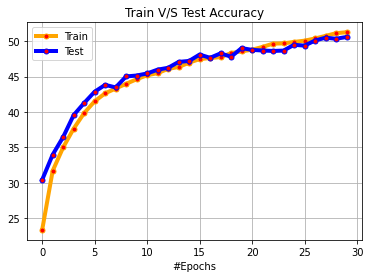

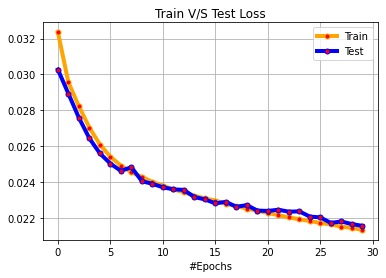

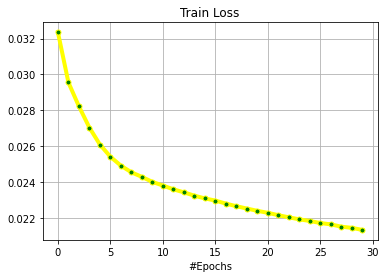

In [0]:
plot(cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss)

## Method 2
- conv -> relu -> conv -> relu -> fc
- kaiming initialization used
- This model has better accuracy due to the better initialization of weights.
- But the model overfits after 25 epochs since it learns the training data over the large number of epochs. 



In [0]:
cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss = train_test(trainloader = cifar10_trainloader, testloader = cifar10_testloader, method = 2, num_epochs = 70)

Epoch 0 Train loss 0.02831036660671234
Train Accuracy:  36.37 %
Epoch 0 Test loss 0.025647568798065186
Test Accuracy:  42.37 %
Epoch 2 Train loss 0.023714544568061827
Train Accuracy:  46.83 %
Epoch 2 Test loss 0.023781033051013947
Test Accuracy:  46.56 %
Epoch 4 Train loss 0.022228165736198426
Train Accuracy:  50.29 %
Epoch 4 Test loss 0.022537470316886903
Test Accuracy:  48.54 %
Epoch 6 Train loss 0.02100671712875366
Train Accuracy:  53.24 %
Epoch 6 Test loss 0.021666427397727967
Test Accuracy:  50.85 %
Epoch 8 Train loss 0.020136422839164735
Train Accuracy:  55.26 %
Epoch 8 Test loss 0.02112112160921097
Test Accuracy:  52.09 %
Epoch 10 Train loss 0.01948282604575157
Train Accuracy:  56.79 %
Epoch 10 Test loss 0.020740206122398377
Test Accuracy:  52.47 %
Epoch 12 Train loss 0.01900964033842087
Train Accuracy:  57.99 %
Epoch 12 Test loss 0.02040280134677887
Test Accuracy:  53.53 %
Epoch 14 Train loss 0.018570324103832244
Train Accuracy:  58.74 %
Epoch 14 Test loss 0.020119557869434358


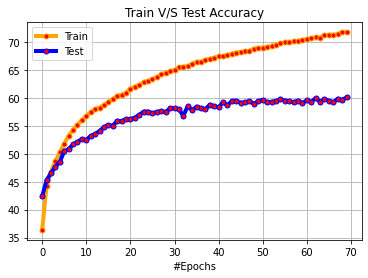

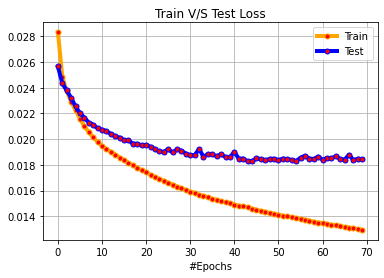

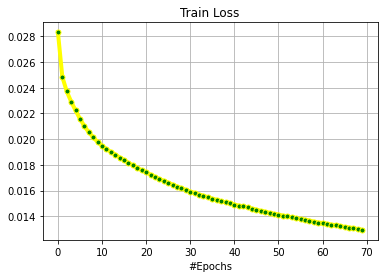

In [0]:
plot(cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss)

## Varying Optimizers
- Adam
- Stochastic Gradient Descent with Nesterov Momentum = 0.9
- Adagrad

## Adam
Works as expected, accuracy ~ 45% for 10 epochs


In [0]:
# Cross Entropy Loss
cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss = train_test(trainloader = cifar10_trainloader, testloader = cifar10_testloader, method = 1)

Epoch 0 Train loss 0.032455288591384884
Train Accuracy:  23.1 %
Epoch 0 Test loss 0.03083781954050064
Test Accuracy:  28.06 %
Epoch 2 Train loss 0.028523230712413788
Train Accuracy:  34.24 %
Epoch 2 Test loss 0.0278296905875206
Test Accuracy:  36.37 %
Epoch 4 Train loss 0.02663347945690155
Train Accuracy:  38.66 %
Epoch 4 Test loss 0.026236345112323763
Test Accuracy:  39.69 %
Epoch 6 Train loss 0.025413034670352937
Train Accuracy:  41.34 %
Epoch 6 Test loss 0.025081539833545684
Test Accuracy:  42.47 %
Epoch 8 Train loss 0.024536538660526276
Train Accuracy:  43.19 %
Epoch 8 Test loss 0.0244231835603714
Test Accuracy:  43.76 %


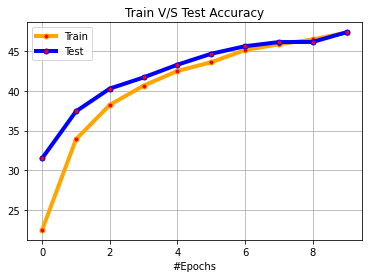

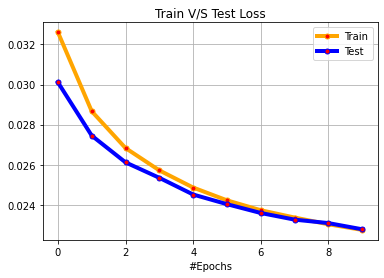

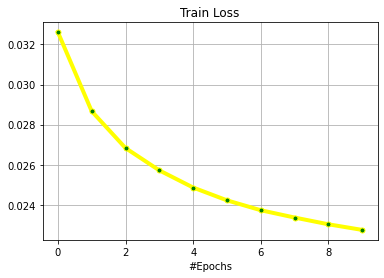

In [0]:
plot(cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss)

## Stochastic Gradient Descent

- When using learning rate 1e-4, no learning takes place, and it remains at 10%, which is random classification
- Hence, the learning rate was changed to 1e-2, and a good accuracy was received for 10 epochs.
- Not as good as Adam for this particular task




In [0]:

cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss = train_test(trainloader = cifar10_trainloader, testloader = cifar10_testloader,optimi = 'SGD')

Epoch 0 Train loss 0.03599019549846649
Train Accuracy:  11.77 %
Epoch 0 Test loss 0.03606726760864258
Test Accuracy:  10.41 %
Epoch 2 Train loss 0.0320806671333313
Train Accuracy:  24.1 %
Epoch 2 Test loss 0.03162817757129669
Test Accuracy:  25.87 %
Epoch 4 Train loss 0.029084838860034944
Train Accuracy:  33.06 %
Epoch 4 Test loss 0.02922531386613846
Test Accuracy:  32.43 %
Epoch 6 Train loss 0.02635736324310303
Train Accuracy:  39.17 %
Epoch 6 Test loss 0.026279090547561647
Test Accuracy:  40.05 %
Epoch 8 Train loss 0.024362156608104705
Train Accuracy:  44.04 %
Epoch 8 Test loss 0.024422195732593535
Test Accuracy:  43.79 %


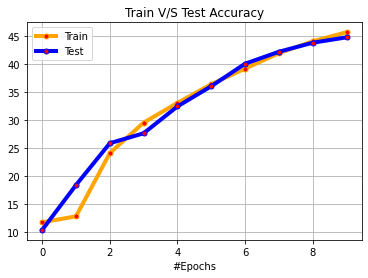

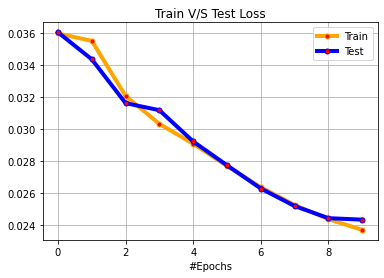

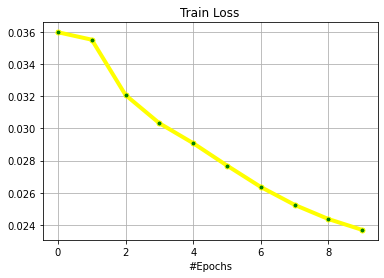

In [0]:
plot(cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss)

## Adagrad
- When a learning rate of 1e-4 is used, accuracy is ~ 16%.
- When learning rate is increased to 1e-2, accuracy considerably increases to ~ 50% for 10 epochs.

In [0]:
cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss = train_test(trainloader = cifar10_trainloader, testloader = cifar10_testloader,optimi = 'Adagrad')

Epoch 0 Train loss 0.03600227933883667
Train Accuracy:  10.0 %
Epoch 0 Test loss 0.03609655613899231
Test Accuracy:  10.0 %
Epoch 2 Train loss 0.035766343007087704
Train Accuracy:  15.05 %
Epoch 2 Test loss 0.035822373747825625
Test Accuracy:  14.8 %
Epoch 4 Train loss 0.03544133864879608
Train Accuracy:  13.42 %
Epoch 4 Test loss 0.03547430272102356
Test Accuracy:  13.28 %
Epoch 6 Train loss 0.03504983952999115
Train Accuracy:  13.01 %
Epoch 6 Test loss 0.035072908067703246
Test Accuracy:  13.23 %
Epoch 8 Train loss 0.03467727119922638
Train Accuracy:  16.17 %
Epoch 8 Test loss 0.03469627468585968
Test Accuracy:  16.93 %


In [0]:
cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss = train_test(trainloader = cifar10_trainloader, testloader = cifar10_testloader,optimi = 'Adagrad', lr = 0.01)

Epoch 0 Train loss 0.029755968663692473
Train Accuracy:  29.38 %
Epoch 0 Test loss 0.02685710277557373
Test Accuracy:  36.72 %
Epoch 2 Train loss 0.0239123738861084
Train Accuracy:  43.97 %
Epoch 2 Test loss 0.02341057974100113
Test Accuracy:  45.58 %
Epoch 4 Train loss 0.022616039016246797
Train Accuracy:  47.59 %
Epoch 4 Test loss 0.023929133760929106
Test Accuracy:  45.08 %
Epoch 6 Train loss 0.021890447549819947
Train Accuracy:  49.42 %
Epoch 6 Test loss 0.022265618538856505
Test Accuracy:  48.76 %
Epoch 8 Train loss 0.02136837214946747
Train Accuracy:  50.64 %
Epoch 8 Test loss 0.02155127100944519
Test Accuracy:  50.58 %


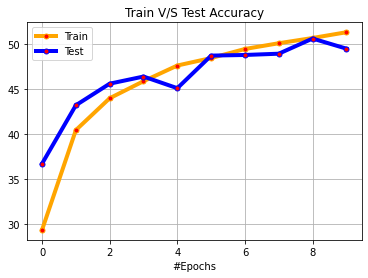

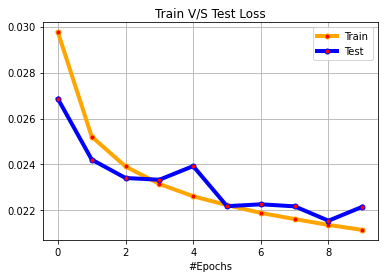

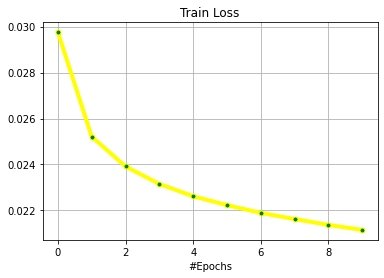

In [0]:
plot(cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss)

## Adding fully connected layers
- We add 4 more fully connected layers, making it a total of 7
- We can see that both the training and testing loss are not increasing as much for the same number of epochs.
- This implies that the model is not learning as fast due to the increased number of parameters it has to train.

In [0]:
cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss = train_test(trainloader = cifar10_trainloader, testloader = cifar10_testloader, method = 3, num_epochs = 30)

Epoch 0 Train loss 0.03475888429164886
Train Accuracy:  14.56 %
Epoch 0 Test loss 0.03324731366634369
Test Accuracy:  15.98 %
Epoch 2 Train loss 0.031134864294528962
Train Accuracy:  25.12 %
Epoch 2 Test loss 0.030835563039779662
Test Accuracy:  25.86 %
Epoch 4 Train loss 0.030053937683105467
Train Accuracy:  27.77 %
Epoch 4 Test loss 0.02982536404132843
Test Accuracy:  28.64 %
Epoch 6 Train loss 0.029219264731407166
Train Accuracy:  30.27 %
Epoch 6 Test loss 0.028946864330768585
Test Accuracy:  30.86 %
Epoch 8 Train loss 0.02859239072084427
Train Accuracy:  31.91 %
Epoch 8 Test loss 0.02864276648759842
Test Accuracy:  32.33 %
Epoch 10 Train loss 0.027974882340431214
Train Accuracy:  33.44 %
Epoch 10 Test loss 0.027858073580265045
Test Accuracy:  34.11 %
Epoch 12 Train loss 0.027226446244716644
Train Accuracy:  35.46 %
Epoch 12 Test loss 0.027201344347000122
Test Accuracy:  35.79 %
Epoch 14 Train loss 0.026276116499900817
Train Accuracy:  37.69 %
Epoch 14 Test loss 0.026402254414558412

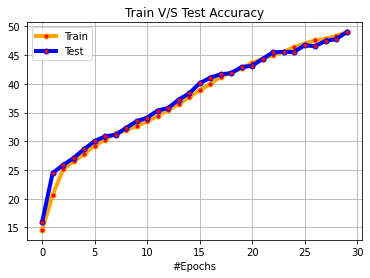

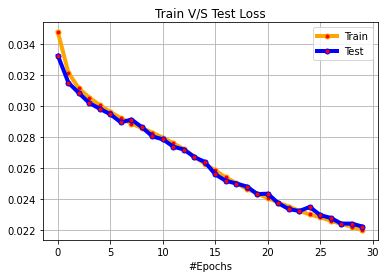

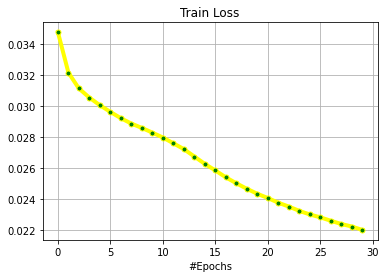

In [0]:
plot(cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss)

## Adding batch normalization
- We add batch normalization to the preexisting model of method 1.
- The model's training accuracy increases due to the addition of the two batch normalization layers
- The batch normalization allows each layer of the network to learn more independently, hence making the model better.
- Model starts to overfit around 40 epochs


In [0]:
cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss = train_test(trainloader = cifar10_trainloader, testloader = cifar10_testloader, method = 4, num_epochs = 30)

Epoch 0 Train loss 0.027917139530181885
Train Accuracy:  35.07 %
Epoch 0 Test loss 0.024068545293807985
Test Accuracy:  44.15 %
Epoch 2 Train loss 0.021506977634429932
Train Accuracy:  50.74 %
Epoch 2 Test loss 0.0209488321185112
Test Accuracy:  52.25 %
Epoch 4 Train loss 0.019615175763368606
Train Accuracy:  55.29 %
Epoch 4 Test loss 0.019947964930534363
Test Accuracy:  54.53 %
Epoch 6 Train loss 0.018599477890729903
Train Accuracy:  57.5 %
Epoch 6 Test loss 0.01908717193007469
Test Accuracy:  57.47 %
Epoch 8 Train loss 0.017855527951717378
Train Accuracy:  59.55 %
Epoch 8 Test loss 0.01837403621673584
Test Accuracy:  58.86 %
Epoch 10 Train loss 0.0172367767226696
Train Accuracy:  60.93 %
Epoch 10 Test loss 0.018369607251882553
Test Accuracy:  58.45 %
Epoch 12 Train loss 0.016702423726320265
Train Accuracy:  62.29 %
Epoch 12 Test loss 0.017879072564840316
Test Accuracy:  59.54 %
Epoch 14 Train loss 0.01625943939805031
Train Accuracy:  63.31 %
Epoch 14 Test loss 0.017618257963657378
Te

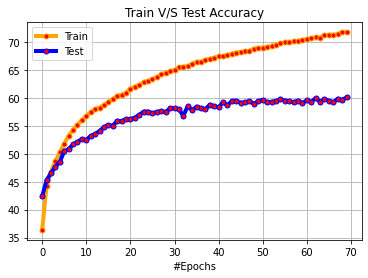

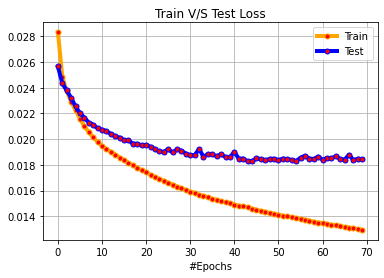

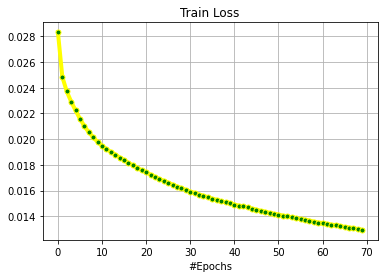

In [0]:
plot(cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss)

## Removing Fully Connected layers
-  On removing all fully connected layers, no real classification is seen
- After this, we remove all but one fully connected layer from the first model to see the need of fully connected layers in a CNN, and we get a sharp increase in accuracy.
- This implies that fully connected layers are of prime importance so that the input features are encapsulated.
- Hence, the fully connected layers over time help in capturing the elements of the input required for classification.
- The increase in FC layers increases classification at the risk of overfitting

In [0]:
cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss = train_test(trainloader = cifar10_trainloader, testloader = cifar10_testloader, method = 5, num_epochs = 30)

Epoch 0 Train loss 0.03245091633081436
Train Accuracy:  25.59 %
Epoch 0 Test loss 0.030293566823005675
Test Accuracy:  31.99 %
Epoch 2 Train loss 0.02843973103761673
Train Accuracy:  35.8 %
Epoch 2 Test loss 0.027943662679195402
Test Accuracy:  37.72 %
Epoch 4 Train loss 0.026630586347579956
Train Accuracy:  40.06 %
Epoch 4 Test loss 0.026346282386779784
Test Accuracy:  40.8 %
Epoch 6 Train loss 0.02545036435365677
Train Accuracy:  42.12 %
Epoch 6 Test loss 0.025257973790168763
Test Accuracy:  42.62 %
Epoch 8 Train loss 0.024742556970119477
Train Accuracy:  43.61 %
Epoch 8 Test loss 0.024617441391944887
Test Accuracy:  43.89 %
Epoch 10 Train loss 0.024244724669456482
Train Accuracy:  44.7 %
Epoch 10 Test loss 0.024270060181617738
Test Accuracy:  45.01 %
Epoch 12 Train loss 0.023850639278888704
Train Accuracy:  45.64 %
Epoch 12 Test loss 0.023834529948234557
Test Accuracy:  45.98 %
Epoch 14 Train loss 0.023547777893543242
Train Accuracy:  46.31 %
Epoch 14 Test loss 0.023567615354061128


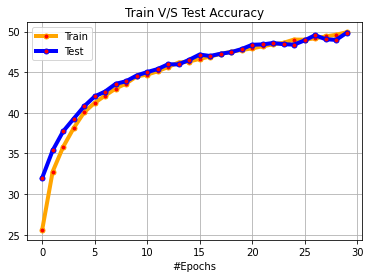

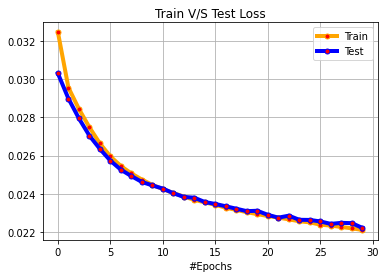

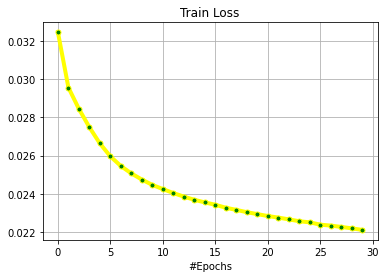

In [0]:
plot(cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss)

## Varying learning rate
- We test for different learning rates, 0.1, 0.001, 0.001, 0.0001
- For a learning rate of 0.1, no learning is done since the training is too fast to capture any information.
- For a learning rate of 0.01, the model improves from 0.1, but is not as good.
- For a learning rate of 0.001, the model starts to overfit slightly above the 20 epochs, indicating that it is learning too many details from the training set.
- For learning rate of 0.0001, the learning is slower than the other tests. But there is no overfitting for 30 epochs 

### Learning rate = 0.1

In [0]:
cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss = train_test(trainloader = cifar10_trainloader, testloader = cifar10_testloader, method = 1, num_epochs = 30, lr = 0.1)

Epoch 0 Train loss 0.11740410886287689
Train Accuracy:  9.84 %
Epoch 0 Test loss 0.036261409997940065
Test Accuracy:  10.0 %
Epoch 2 Train loss 0.03614556882858276
Train Accuracy:  10.04 %
Epoch 2 Test loss 0.03628281333446503
Test Accuracy:  10.0 %
Epoch 4 Train loss 0.036152034974098204
Train Accuracy:  9.99 %
Epoch 4 Test loss 0.03633590083122253
Test Accuracy:  10.0 %
Epoch 6 Train loss 0.036148593683242795
Train Accuracy:  10.13 %
Epoch 6 Test loss 0.03636818180084229
Test Accuracy:  10.0 %
Epoch 8 Train loss 0.03615383156299591
Train Accuracy:  10.01 %
Epoch 8 Test loss 0.036272672605514526
Test Accuracy:  10.0 %
Epoch 10 Train loss 0.036164373202323914
Train Accuracy:  9.94 %
Epoch 10 Test loss 0.03619877026081085
Test Accuracy:  10.0 %
Epoch 12 Train loss 0.03614847599506378
Train Accuracy:  10.07 %
Epoch 12 Test loss 0.0362496337890625
Test Accuracy:  10.0 %
Epoch 14 Train loss 0.036165206780433654
Train Accuracy:  10.15 %
Epoch 14 Test loss 0.03622400331497192
Test Accuracy: 

### Learning rate = 0.01

In [0]:
cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss = train_test(trainloader = cifar10_trainloader, testloader = cifar10_testloader, method = 1, num_epochs = 30, lr = 0.01)

Epoch 0 Train loss 0.029189408905506135
Train Accuracy:  31.04 %
Epoch 0 Test loss 0.027398265397548676
Test Accuracy:  36.21 %
Epoch 2 Train loss 0.025446906151771545
Train Accuracy:  41.26 %
Epoch 2 Test loss 0.025989460039138795
Test Accuracy:  39.54 %
Epoch 4 Train loss 0.02424355677127838
Train Accuracy:  44.28 %
Epoch 4 Test loss 0.024555451393127443
Test Accuracy:  44.09 %
Epoch 6 Train loss 0.023669011359214783
Train Accuracy:  46.16 %
Epoch 6 Test loss 0.024519493961334227
Test Accuracy:  44.79 %
Epoch 8 Train loss 0.023037680280208587
Train Accuracy:  47.77 %
Epoch 8 Test loss 0.023595652079582214
Test Accuracy:  45.97 %
Epoch 10 Train loss 0.022720283029079438
Train Accuracy:  48.76 %
Epoch 10 Test loss 0.02481651603579521
Test Accuracy:  45.16 %
Epoch 12 Train loss 0.02239755865097046
Train Accuracy:  49.31 %
Epoch 12 Test loss 0.023063282513618468
Test Accuracy:  48.38 %
Epoch 14 Train loss 0.022180982081890108
Train Accuracy:  50.1 %
Epoch 14 Test loss 0.02306552258729934

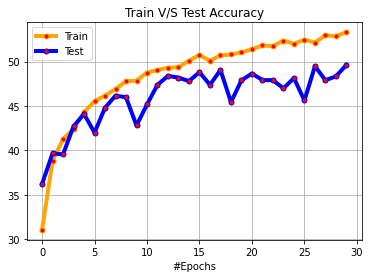

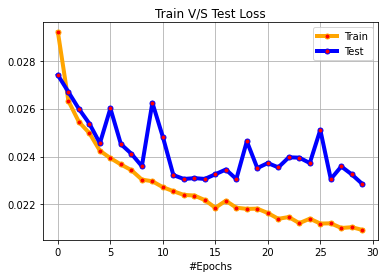

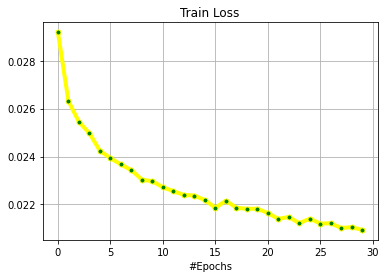

In [0]:
plot(cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss)

### Learning rate = 0.001

In [0]:
cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss = train_test(trainloader = cifar10_trainloader, testloader = cifar10_testloader, method = 1, num_epochs = 30, lr = 0.001)

Epoch 0 Train loss 0.0284243941283226
Train Accuracy:  33.29 %
Epoch 0 Test loss 0.02569301972389221
Test Accuracy:  39.73 %
Epoch 2 Train loss 0.02263741551041603
Train Accuracy:  47.65 %
Epoch 2 Test loss 0.021951331090927124
Test Accuracy:  49.23 %
Epoch 4 Train loss 0.02065375601053238
Train Accuracy:  52.62 %
Epoch 4 Test loss 0.020563525515794753
Test Accuracy:  52.92 %
Epoch 6 Train loss 0.01916860643863678
Train Accuracy:  56.32 %
Epoch 6 Test loss 0.020171793049573897
Test Accuracy:  54.16 %
Epoch 8 Train loss 0.01793928391456604
Train Accuracy:  58.94 %
Epoch 8 Test loss 0.018995503002405167
Test Accuracy:  57.03 %
Epoch 10 Train loss 0.016971045863628388
Train Accuracy:  61.09 %
Epoch 10 Test loss 0.018650246173143387
Test Accuracy:  58.18 %
Epoch 12 Train loss 0.016234444193840028
Train Accuracy:  62.84 %
Epoch 12 Test loss 0.01818048803806305
Test Accuracy:  59.22 %
Epoch 14 Train loss 0.01546493481516838
Train Accuracy:  64.79 %
Epoch 14 Test loss 0.018487155705690383
Tes

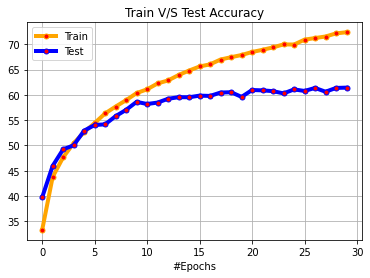

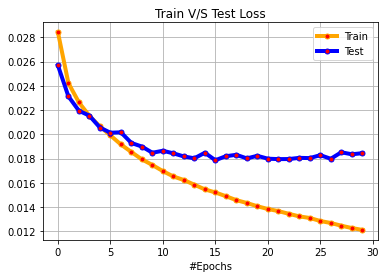

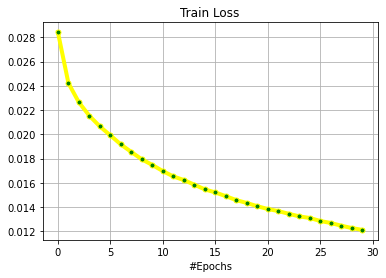

In [0]:
plot(cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss)

### Learning rate = 0.0001

In [0]:
cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss = train_test(trainloader = cifar10_trainloader, testloader = cifar10_testloader, method = 1, num_epochs = 30, lr = 0.0001)

Epoch 0 Train loss 0.032827669267654416
Train Accuracy:  22.38 %
Epoch 0 Test loss 0.030659768772125243
Test Accuracy:  28.63 %
Epoch 2 Train loss 0.02757111728191376
Train Accuracy:  36.35 %
Epoch 2 Test loss 0.0268716757774353
Test Accuracy:  37.81 %
Epoch 4 Train loss 0.02526780061006546
Train Accuracy:  41.3 %
Epoch 4 Test loss 0.024918532204627992
Test Accuracy:  42.19 %
Epoch 6 Train loss 0.02429858787059784
Train Accuracy:  43.66 %
Epoch 6 Test loss 0.024223096048831938
Test Accuracy:  44.19 %
Epoch 8 Train loss 0.023624930171966554
Train Accuracy:  45.1 %
Epoch 8 Test loss 0.0234566109418869
Test Accuracy:  45.74 %
Epoch 10 Train loss 0.023075134482383727
Train Accuracy:  46.53 %
Epoch 10 Test loss 0.023185414004325867
Test Accuracy:  46.63 %
Epoch 12 Train loss 0.022604630215168
Train Accuracy:  47.83 %
Epoch 12 Test loss 0.022843438243865966
Test Accuracy:  47.28 %
Epoch 14 Train loss 0.022197305936813353
Train Accuracy:  48.95 %
Epoch 14 Test loss 0.022332274508476257
Test A

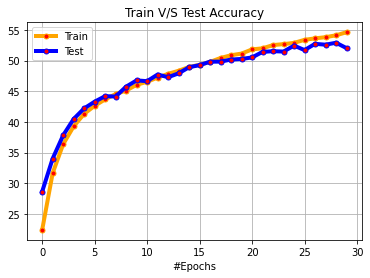

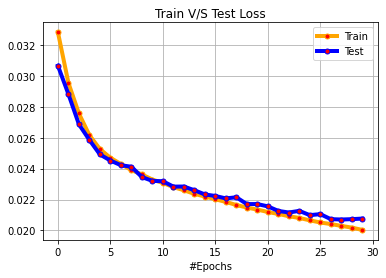

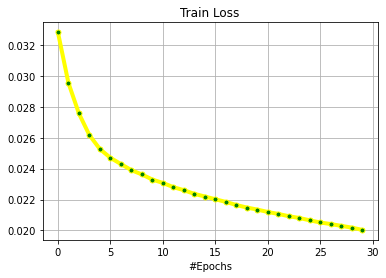

In [0]:
plot(cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss)

## Varying losses
- Cross Entropy
- L1
- L2
- We see that the L1 losses does not work as well as Cross Entropy and L2 losses, which work better for classification tasks.

### Cross Entropy

In [35]:
cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss = train_test(trainloader = cifar10_trainloader, testloader = cifar10_testloader, num_epochs = 30)

Epoch 0 Train loss 0.03235381579399109
Train Accuracy:  23.8 %
Epoch 0 Test loss 0.03017472482919693
Test Accuracy:  30.76 %
Epoch 2 Train loss 0.027322877237796785
Train Accuracy:  37.14 %
Epoch 2 Test loss 0.026626333487033842
Test Accuracy:  38.23 %
Epoch 4 Train loss 0.025284030783176422
Train Accuracy:  41.64 %
Epoch 4 Test loss 0.024975963521003723
Test Accuracy:  42.43 %
Epoch 6 Train loss 0.02448316572189331
Train Accuracy:  43.28 %
Epoch 6 Test loss 0.024246564590930938
Test Accuracy:  44.21 %
Epoch 8 Train loss 0.023863536615371703
Train Accuracy:  44.71 %
Epoch 8 Test loss 0.023949354028701783
Test Accuracy:  44.81 %
Epoch 10 Train loss 0.023368281440734863
Train Accuracy:  46.02 %
Epoch 10 Test loss 0.023258136773109436
Test Accuracy:  46.02 %
Epoch 12 Train loss 0.02292942199230194
Train Accuracy:  47.21 %
Epoch 12 Test loss 0.022802755713462828
Test Accuracy:  47.76 %
Epoch 14 Train loss 0.022562573735713957
Train Accuracy:  48.09 %
Epoch 14 Test loss 0.02273227859735489


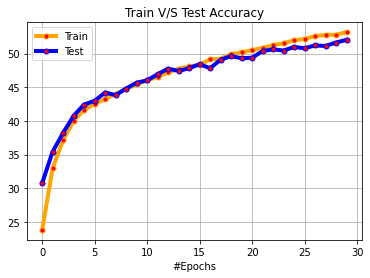

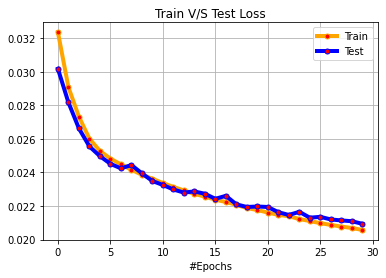

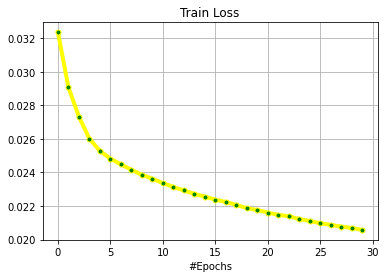

In [36]:
plot(cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss)

### L1 Loss

In [31]:
cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss = train_test(trainloader = cifar10_trainloader, testloader = cifar10_testloader, num_epochs = 30, loss_type = 'l1')

Epoch 0 Train loss 0.02562958305835724
Train Accuracy:  20.02 %
Epoch 0 Test loss 0.02353138518333435
Test Accuracy:  26.58 %
Epoch 2 Train loss 0.022855551342964173
Train Accuracy:  27.7 %
Epoch 2 Test loss 0.0226971852183342
Test Accuracy:  28.46 %
Epoch 4 Train loss 0.02206899701356888
Train Accuracy:  30.35 %
Epoch 4 Test loss 0.021987938463687896
Test Accuracy:  30.58 %
Epoch 6 Train loss 0.021650766837596893
Train Accuracy:  31.49 %
Epoch 6 Test loss 0.0216632110953331
Test Accuracy:  31.3 %
Epoch 8 Train loss 0.02126389032125473
Train Accuracy:  32.7 %
Epoch 8 Test loss 0.021204432106018068
Test Accuracy:  32.92 %
Epoch 10 Train loss 0.020983206026554107
Train Accuracy:  33.54 %
Epoch 10 Test loss 0.020956089627742768
Test Accuracy:  33.85 %
Epoch 12 Train loss 0.020606279680728912
Train Accuracy:  34.91 %
Epoch 12 Test loss 0.020526439011096954
Test Accuracy:  35.11 %
Epoch 14 Train loss 0.020241376444101334
Train Accuracy:  36.11 %
Epoch 14 Test loss 0.020079648721218108
Test 

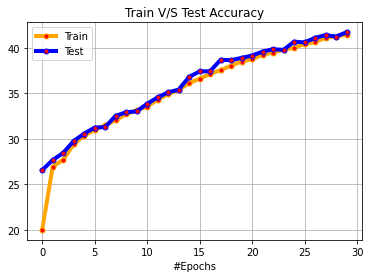

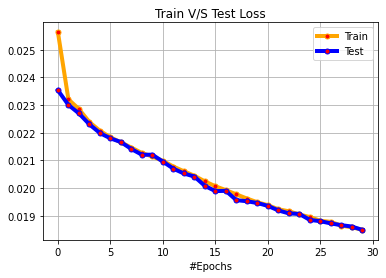

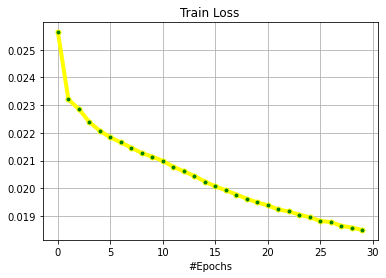

In [32]:
plot(cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss)

### L2 Loss

In [33]:
cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss = train_test(trainloader = cifar10_trainloader, testloader = cifar10_testloader, num_epochs = 30, loss_type = 'l2')

Epoch 0 Train loss 0.01331799992442131
Train Accuracy:  22.65 %
Epoch 0 Test loss 0.012842462611198426
Test Accuracy:  29.36 %
Epoch 2 Train loss 0.012329465761184693
Train Accuracy:  33.86 %
Epoch 2 Test loss 0.01224024885892868
Test Accuracy:  34.94 %
Epoch 4 Train loss 0.011555669370889664
Train Accuracy:  39.55 %
Epoch 4 Test loss 0.011414718073606491
Test Accuracy:  41.25 %
Epoch 6 Train loss 0.010965514270067214
Train Accuracy:  43.76 %
Epoch 6 Test loss 0.010858898329734802
Test Accuracy:  44.85 %
Epoch 8 Train loss 0.010582988983392716
Train Accuracy:  46.1 %
Epoch 8 Test loss 0.010502567887306214
Test Accuracy:  46.56 %
Epoch 10 Train loss 0.010320935755968094
Train Accuracy:  47.88 %
Epoch 10 Test loss 0.010414966160058976
Test Accuracy:  46.98 %
Epoch 12 Train loss 0.010121560986042022
Train Accuracy:  49.19 %
Epoch 12 Test loss 0.010211314725875855
Test Accuracy:  48.46 %
Epoch 14 Train loss 0.009955947295427323
Train Accuracy:  50.1 %
Epoch 14 Test loss 0.00997341138720512

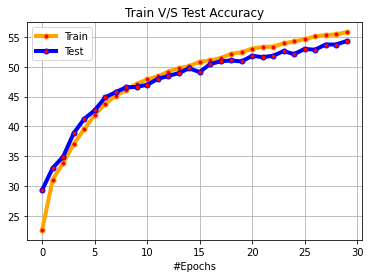

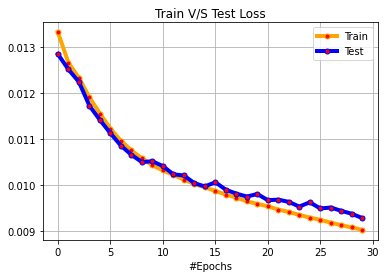

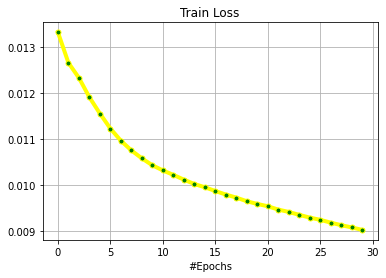

In [34]:
plot(cifar10_trainAcc, cifar10_trainLoss, cifar10_testAcc, cifar10_testLoss)